In [1]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences, to_categorical

### 데이터

In [2]:
data1 = pd.read_csv('4차년도.csv',encoding='utf-8')
data1.head(3)

,wav_id,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번감정세기,5번 감정,5번 감정세기,나이,성별
0,5e258fd1305bcf3ad153a6a4,"어, 청소 니가 대신 해 줘!",anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male
1,5e258fe2305bcf3ad153a6a5,둘 다 청소 하기 싫어. 귀찮아.,anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male
2,5e258ff5305bcf3ad153a6a6,둘 다 하기 싫어서 화내.,anger,Angry,1,Angry,1,Neutral,0,Angry,1,Angry,1,27,male


In [3]:
data2 = pd.read_csv('5차년도.csv',encoding='utf-8')
data2.head(3)

,wav_id,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번감정세기,5번 감정,5번 감정세기,나이,성별
0,5ed10dbc2880d70f286121c3,개를 예쁘다고 사놓고 끝까지 키우지도 않고 버리는 사람들이 엄청 많아졌대.,disgust,Angry,2,Angry,2,Angry,2,Angry,2,Angry,2,33,female
1,5ecb60ef9aa8ea0eec53edb1,지금도 그대로 있어. 치우는 사람이 없어.,disgust,Neutral,0,Disgust,2,Sadness,2,Disgust,2,Disgust,1,48,female
2,5f052858b140144dfcfef768,맞아. 무기력증인 것 같아. 한동안 정말 바빴었거든.,sad,Sadness,2,Sadness,1,Sadness,2,Sadness,2,Sadness,2,48,female


In [4]:
data3 = pd.read_csv('5차년도_2차.csv',encoding='utf-8')
data3.head(3)

,wav_id,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번감정세기,5번 감정,5번 감정세기,나이,성별
0,5f4141e29dd513131eacee2f,헐! 나 이벤트에 당첨 됐어.,happiness,angry,2,surprise,2,happiness,2,happiness,2,happiness,2,48,female
1,5f4141f59dd513131eacee30,내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.,happiness,neutral,0,happiness,2,happiness,2,happiness,2,happiness,2,48,female
2,5f4142119dd513131eacee31,"한 명 뽑는 거였는데, 그게 바로 내가 된 거야.",happiness,angry,2,happiness,2,happiness,2,happiness,2,happiness,2,48,female


In [5]:
data = pd.concat([data1,data2,data3])
data.head(3)

,wav_id,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번감정세기,5번 감정,5번 감정세기,나이,성별
0,5e258fd1305bcf3ad153a6a4,"어, 청소 니가 대신 해 줘!",anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male
1,5e258fe2305bcf3ad153a6a5,둘 다 청소 하기 싫어. 귀찮아.,anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male
2,5e258ff5305bcf3ad153a6a6,둘 다 하기 싫어서 화내.,anger,Angry,1,Angry,1,Neutral,0,Angry,1,Angry,1,27,male


In [6]:
text = data.loc[:,'발화문':'상황']
text.head(3)

,발화문,상황
0,"어, 청소 니가 대신 해 줘!",anger
1,둘 다 청소 하기 싫어. 귀찮아.,anger
2,둘 다 하기 싫어서 화내.,anger


In [7]:
text = text.drop_duplicates(['발화문', '상황'], keep = False)

In [8]:
# 중복 제거
text.drop_duplicates(subset=['발화문'], inplace=True)
# Null 값이 존재하는 행 제거
text = text.dropna(how = 'any')

In [9]:
print('샘플 데이터 수: ',len(text))
print(text.isnull().sum())

샘플 데이터 수:  35652
발화문    0
상황     0
dtype: int64


In [10]:
text['상황'].unique()

array(['anger', 'sad', 'fear', 'disgust', 'neutral', 'happiness',
       'sadness', 'angry', 'surprise'], dtype=object)

In [25]:
text['상황'].value_counts()

sad          8994
anger        7104
disgust      3972
happiness    3382
fear         3280
angry        2780
neutral      2648
sadness      2128
surprise     1364
Name: 상황, dtype: int64

In [26]:
text.loc[(text['상황'] == "anger"), '상황'] = 0
text.loc[(text['상황'] == "angry"), '상황'] = 0
text.loc[(text['상황'] == "sad"), '상황'] = 1
text.loc[(text['상황'] == "sadness"), '상황'] = 1
text.loc[(text['상황'] == "fear"), '상황'] = 2
text.loc[(text['상황'] == "disgust"), '상황'] = 3
text.loc[(text['상황'] == "neutral"), '상황'] = 4
text.loc[(text['상황'] == "happiness"), '상황'] = 5
text.loc[(text['상황'] == "surprise"), '상황'] = 6

토큰화

In [27]:
okt = Okt()
stopwords = pd.read_csv('korean_stopwords.csv')

In [28]:
input = []
for sentence in tqdm(text['발화문']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    input.append(stopwords_removed_sentence)

100%|██████████| 35652/35652 [00:44<00:00, 793.14it/s] 


In [29]:
label = text['상황']

x_train, x_test, y_train, y_test = train_test_split(input,label,test_size=0.2, random_state=71, shuffle=True)

정수 인코딩

In [30]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

In [31]:
total_cnt = len(tokenizer.word_index) # 단어의 수
vocab_size = total_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4705


In [32]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [33]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

패딩

In [34]:
print('최대 길이 :',max(len(i) for i in x_train))
print('평균 길이 :',sum(map(len, x_train))/len(x_train))

최대 길이 : 56
평균 길이 : 11.466393183969707


In [35]:
import matplotlib.pyplot as plt

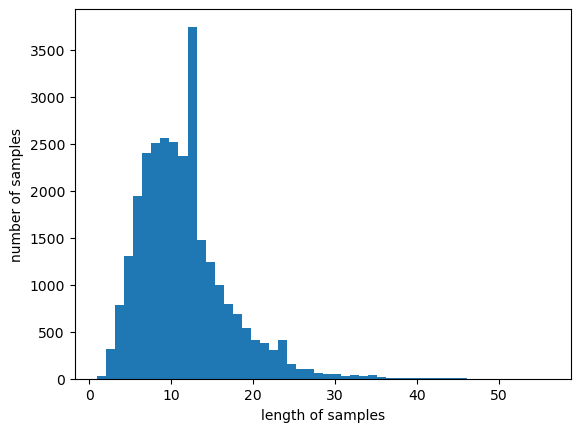

In [36]:
plt.hist([len(i) for i in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [37]:
def below_len(max_len,data):
    cnt = 0
    for i in data:
        if len(i) <= max_len:
            cnt += 1
    print('길이가 %s 이하인 text 비율: %s'%(max_len, (cnt/len(data)*100)))

In [38]:
max_len = 25
below_len(max_len, x_train)

길이가 25 이하인 text 비율: 97.86823743907998


In [39]:
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [40]:
train_x, x_val, train_y, y_val = train_test_split(x_train,y_train,test_size=0.1, random_state=71, shuffle=True)

### LSTM

In [41]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [43]:
embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(7, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('lstm_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(train_x, train_y, batch_size=32, epochs=15, callbacks=[es, mc], validation_data=(x_val,y_val))

Epoch 1/15
801/803 [============================>.] - ETA: 0s - loss: 1.0427 - acc: 0.6218
Epoch 1: val_acc improved from -inf to 0.83456, saving model to lstm_best_model.h5
803/803 [==============================] - 10s 9ms/step - loss: 1.0422 - acc: 0.6221 - val_loss: 0.5325 - val_acc: 0.8346
Epoch 2/15
801/803 [============================>.] - ETA: 0s - loss: 0.4162 - acc: 0.8655
Epoch 2: val_acc improved from 0.83456 to 0.86050, saving model to lstm_best_model.h5
803/803 [==============================] - 7s 8ms/step - loss: 0.4161 - acc: 0.8654 - val_loss: 0.4120 - val_acc: 0.8605
Epoch 3/15
801/803 [============================>.] - ETA: 0s - loss: 0.3135 - acc: 0.8961
Epoch 3: val_acc improved from 0.86050 to 0.86470, saving model to lstm_best_model.h5
803/803 [==============================] - 7s 9ms/step - loss: 0.3134 - acc: 0.8962 - val_loss: 0.4065 - val_acc: 0.8647
Epoch 4/15
803/803 [==============================] - ETA: 0s - loss: 0.2643 - acc: 0.9106
Epoch 4: val_acc 

In [44]:
loaded_model = load_model('lstm_best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

223/223 [==============================] - 2s 7ms/step - loss: 0.3894 - acc: 0.8710

 테스트 정확도: 0.8710


예측

In [45]:
emotions = ['anger', 'sad', 'fear', 'disgust', 'neutral', 'happiness', 'surprise']

In [64]:
def sentiment_predict(text):
    text = okt.morphs(text, stem=True) # 토큰화
    text = [word for word in text if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([text]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = loaded_model.predict(pad_new) # 예측

    for i in range(0,len(score[0])):
        temp =score[0][i]
        print("%s: %4f %% "%(emotions[i],temp*100))

In [67]:
sentiment_predict('어제 헤어졌어.')

1/1 [==============================] - 0s 27ms/step
anger: 2.109141 % 
sad: 96.738040 % 
fear: 0.627809 % 
disgust: 0.144777 % 
neutral: 0.126732 % 
happiness: 0.223498 % 
surprise: 0.029999 % 


In [68]:
sentiment_predict('어제 비가와서 너무 놀랐어!')

1/1 [==============================] - 0s 27ms/step
anger: 1.816015 % 
sad: 0.074495 % 
fear: 92.162675 % 
disgust: 1.381358 % 
neutral: 0.475360 % 
happiness: 0.048414 % 
surprise: 4.041686 % 


In [72]:
sentiment_predict('조금 화가 났었지만 지금은 괜찮아.')


1/1 [==============================] - 0s 37ms/step
anger: 25.662661 % 
sad: 4.308002 % 
fear: 60.508603 % 
disgust: 3.261201 % 
neutral: 3.234426 % 
happiness: 0.223725 % 
surprise: 2.801387 % 


In [71]:
sentiment_predict('어떻게 나를 빼고 영화를 볼 수 있지?')

1/1 [==============================] - 0s 28ms/step
anger: 81.254870 % 
sad: 4.024636 % 
fear: 3.426353 % 
disgust: 0.630840 % 
neutral: 8.094681 % 
happiness: 2.351257 % 
surprise: 0.217371 % 
